### BRSET

* [Dataset](https://physionet.org/content/brazilian-ophthalmological/1.0.0/)

* [Original Paper](https://www.medrxiv.org/content/10.1101/2024.01.23.24301660v1)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/brset/'
FILE = 'embeddings_blip2.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.head()

,DR_ICDR,DR_2,DR_3,split,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
0,0,0,0,train,0.756176,0.067413,0.517691,0.850900,0.897879,0.886459,...,0.271387,-0.288756,0.762782,0.033875,0.316411,-0.541192,-0.286521,-1.395537,-0.007057,-0.257576
1,0,0,0,test,0.897472,0.112046,0.534999,0.924647,0.981565,0.940106,...,0.275392,-0.406108,0.823555,0.039392,0.274376,-0.524527,-0.297611,-1.414428,-0.011528,-0.346907
2,0,0,0,train,0.848792,0.059313,0.491263,0.937545,0.973772,0.962862,...,0.280585,-0.368116,0.791464,0.082406,0.277600,-0.508056,-0.344585,-1.424028,-0.048961,-0.366231
3,0,0,0,train,0.850857,0.109016,0.542291,0.928138,0.968662,0.900882,...,0.300671,-0.399869,0.810622,0.080663,0.209190,-0.503450,-0.339397,-1.440227,-0.013969,-0.365725
4,0,0,0,test,0.571740,0.026423,0.542643,0.787763,0.942022,0.824538,...,0.205573,-0.349269,0.691782,0.089352,0.232892,-0.584080,-0.178231,-1.328320,0.031563,-0.108895


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors. 
# In this case, since we just have multimodal embeddings instead of unimodal embeddings,
# We'll split the column into half and half so we can use the same code.
# Identify columns with "embedding_" in their names
embedding_columns = [column for column in df.columns if 'embedding_' in column]

# Split the embedding columns evenly between text and image columns
num_embeddings = len(embedding_columns)
half_num_embeddings = num_embeddings // 2

text_columns = embedding_columns[:half_num_embeddings]
image_columns = embedding_columns[half_num_embeddings:]

label_columns = 'DR_2'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (13012, 772)
Test Shape: (3254, 772)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.38 MB
The number of parameters of the model are: 98817


STAGE:2024-02-07 19:05:59 6173:6173 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.9352
Epoch 1/15 - Training Time: 1.12 seconds | Inference Time: 0.21 seconds
Epoch 2/15 - Test Accuracy: 0.9352
Epoch 2/15 - Training Time: 0.96 seconds | Inference Time: 0.25 seconds
Epoch 3/15 - Test Accuracy: 0.9352
Epoch 3/15 - Training Time: 0.87 seconds | Inference Time: 0.23 seconds
Epoch 4/15 - Test Accuracy: 0.9352
Epoch 4/15 - Training Time: 0.88 seconds | Inference Time: 0.23 seconds
Epoch 5/15 - Test Accuracy: 0.9352
Epoch 5/15 - Training Time: 0.85 seconds | Inference Time: 0.24 seconds
Epoch 6/15 - Test Accuracy: 0.9352
Epoch 6/15 - Training Time: 0.91 seconds | Inference Time: 0.25 seconds
Epoch 7/15 - Test Accuracy: 0.9352
Epoch 7/15 - Training Time: 0.87 seconds | Inference Time: 0.24 seconds
Epoch 8/15 - Test Accuracy: 0.9352
Epoch 8/15 - Training Time: 0.88 seconds | Inference Time: 0.23 seconds
Epoch 9/15 - Test Accuracy: 0.9352
Epoch 9/15 - Training Time: 0.86 seconds | Inference Time: 0.30 seconds
Epoch 10/15 - Test Accuracy: 0.9352
E

STAGE:2024-02-07 19:06:20 6173:6173 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 19:06:20 6173:6173 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.95%        1.634s        54.25%        8.904s       2.910ms    -572.77 Mb    -578.14 Mb          3060  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        39.19%        6.433s        39.85%        6.540s       1.697ms     714.26 Mb     712.77 Mb          3855  
                              Optimizer.step#AdamW.step         7.14%        1.172s        21.88%        3.592s       1.174ms     772.03 Kb      -2.23

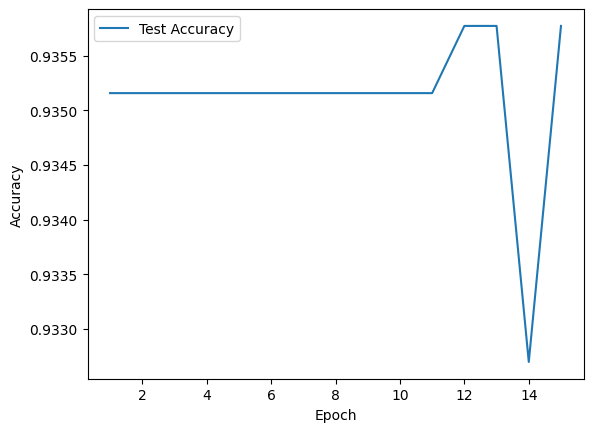

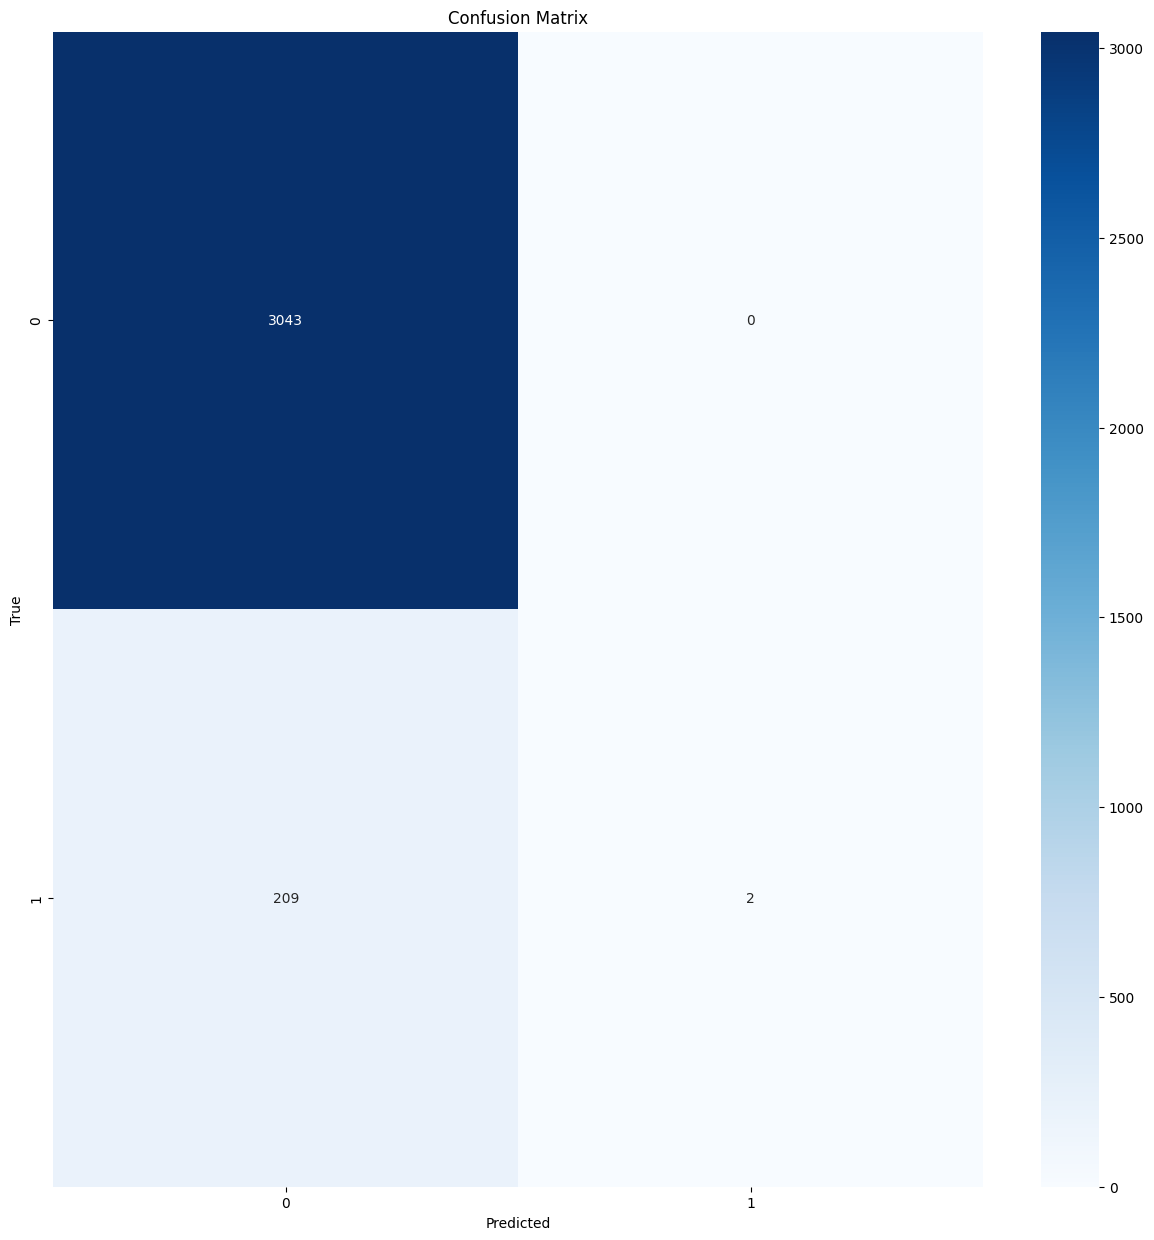

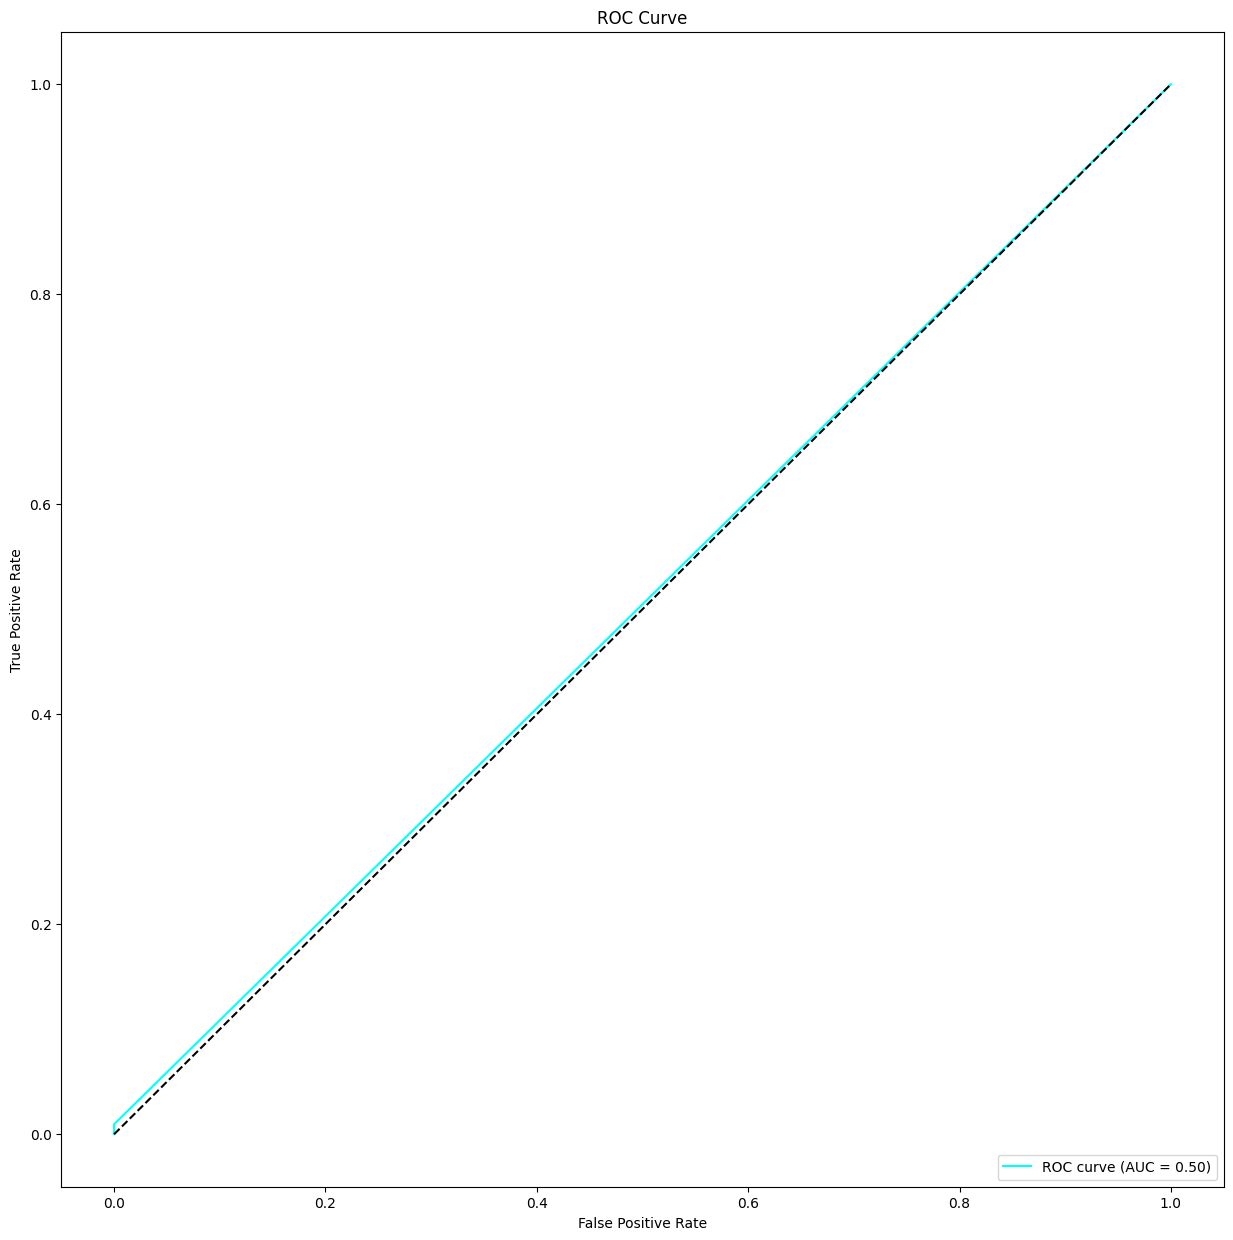

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      3043
         1.0       1.00      0.01      0.02       211

    accuracy                           0.94      3254
   macro avg       0.97      0.50      0.49      3254
weighted avg       0.94      0.94      0.91      3254



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)